# Modelling functions
## Beginners Guide to Modelling Functions

# Table of Contents

- Introduction
- Linear models
- Quadratic models
- Cubic models
- Exponential models
- Logarithmic models
- Sinusoidal models
- Logistic models

# Introduction

If you want to revise you highschool mathematics, this is for you. We are going to draw a scatter graph and model a regression lines from linear to logistic on Jupyter Notebook. You can find all codes in this [repo](https://nbviewer.jupyter.org/github/shinokada/python-for-ib-diploma-mathematics/blob/master/Modelling_functions.ipynb).

# Linear models

The first one is a linear model. A linear model is express as $y=mx+c$.
We are going to use [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) or [numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) to create data. If you want to read more about linear relationship, please read [A Measure of Linear Relationship](https://towardsdatascience.com/a-measure-of-linear-relationship-5dd4a995ee7e?source=friends_link&sk=a68b5bc35334e5a501ead9900f0ea5db).

We import Python libraries `numpy` and `matplotlib`. We create year and co2 array.

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])


First we create a scatter plot using matplotlib. Add the title, label, x and y axis labels. You need to use `show()` method. You can plot without it but this will remove unnessary outputs. 

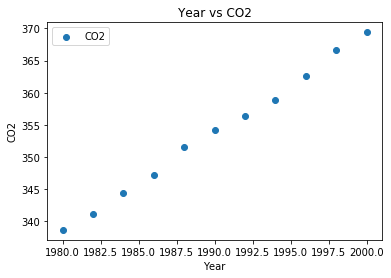

In [145]:
plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

## Intgers in the x-axis

As you can see in the above graph, you have decimals in x-axis. We use the first three lines to make them integers in the following codes.

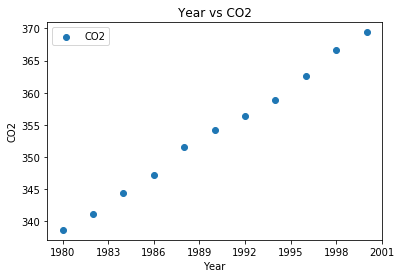

In [146]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

## Finding a Linear model with scikit-learn

We are going to use [scikit-learn](https://scikit-learn.org/stable/). 
One way to find the regression slope and intercept is to use [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). This class require the x values to be one column. We modify year data using `reshape(-1,1)`. The original year data has 1 by 11 shape. You need to reshape the year data to 11 by 1.

In [154]:
year1=year.reshape((-1,1))
print(np.shape(year))
print(np.shape(year1))

(11,)
(11, 1)


We import [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), reshape the year data, fit our data using `LinearRegression().fit()`. This will return the slope, `coef_` and the y-intercept, `intercept_`. We print out our regression line equation.

In [155]:
from sklearn.linear_model import LinearRegression

year1=year.reshape((-1,1))

reg = LinearRegression().fit(year1,co2) 

slope=reg.coef_
intercept=reg.intercept_
print("""The equation of reegression line is y=%.3fx+%.3f.""" % (slope,intercept))


The equation of reegression line is y=1.538x+-2707.255.


We draw a scatter plot and our linear regression line together. We use a new x domain from 1975 to 2005 taking 100 samples for the regression line, `np.linspace(1975,2005,100)`. Then using x domain, slope and y-intercept to draw a regression line.

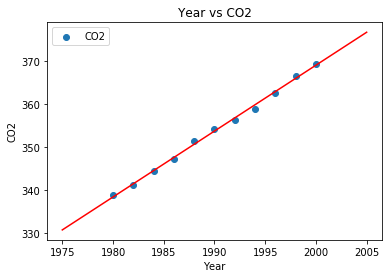

The equation of reegression line is y=1.538x+-2707.255.


In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])

year1=year.reshape((-1,1))

reg = LinearRegression().fit(year1,co2) 
slope=reg.coef_
intercept=reg.intercept_

plt.scatter(year,co2,label='CO2')
X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

print("""The equation of reegression line is y=%.3fx+%.3f.""" % (slope,intercept))


## Finding a Linear model with scipy

Another way to find the regression slope and intercept is to use [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). This returns `slope, intercept, rvalue, pvalue, stderr`. 

In [156]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(year,co2)
print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')


The equation of regression line is y=1.538x+-2707.255.


## Graph

To draw a line we need x points. We use `np.linspace` which is `numpy.linspace` since we used `import numpy as np`. Our data is from 1975 to 2000. So let's use 1960 for `start`, 2005 for `stop` and 100 for number of samples.

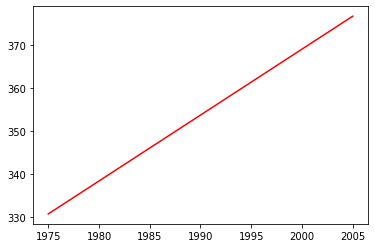

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Now we put scatter plot, regression line and a regression equation together.

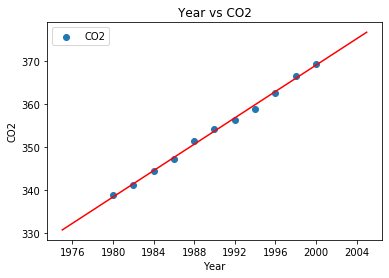

The equation of regression line is y=1.538x+-2707.255.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(year,co2)
print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')


## Practice

1. Use the following data to graph a scatter plot and regression line. Find the regression equation.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp = np.array([55,60,65,70,75,80,85,90])
rate = np.array([45,80,92,114,141,174,202,226])

## Answer

Did you draw a scatter and regression graph? The regression line should be $y=5.119x-236.88$.

# Quadratic models

We use the numpy's `arrange` to create 10 integers from 0 to 9.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(10)
time

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
height = np.array([450,445,430,409,375,331,280,215,144,59])

Let's plot the above data.

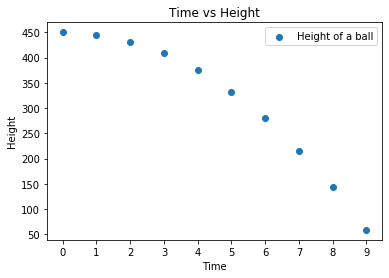

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.scatter(time,height,label='Height of a ball')
plt.title("Time vs Height")
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend()
plt.show()

## numpy.polyfit & poly1d

`numpy.polyfit` fits a polynomial. It requres x, y and degree of the fitting polynomial. It returns an array with polynomial coefficients from highter power to the constant.

In [13]:
coef = np.polyfit(time, height, 2)
coef

array([ -4.93939394,   1.23030303, 449.03636364])

Let's print out the quadratic regression line.

In [14]:
print(f'The equation of regression line is y={coef[0]:.3f}x^2+{coef[1]:.3f}x+{coef[2]:.3f}.')

The equation of regression line is y=-4.939x^2+1.230x+449.036.


The numpy's `poly1d` can be used with the `polyfit`. In our case, we use `np.poly1d(coefficients)`. This will return a polynomial using our coefficient.

In [15]:
equ = np.poly1d(coef)

We can find a value for any x. For example if you want to find y value when x=1:

In [16]:
equ(1)

445.3272727272727

We use this to draw our regression line. We defined time from 0 to 9, so we use it.

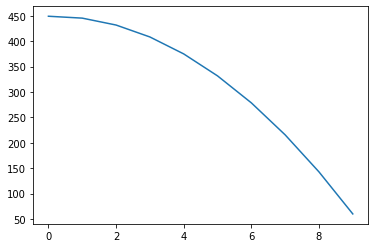

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = equ(time)
plt.plot(time, y)
plt.show()

We put all together.

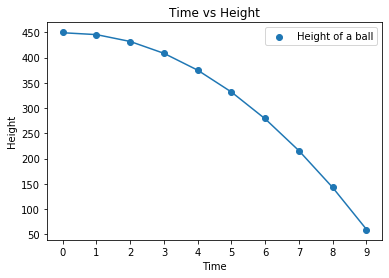

The equation of regression line is y=-4.939x^2+1.230x+449.036.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
time = np.arange(10)
height = np.array([450,445,430,409,375,331,280,215,144,59])
plt.scatter(time,height,label='Height of a ball')

coef = np.polyfit(time, height, 2)
equ = np.poly1d(coef)
y = equ(time)
plt.plot(time, y)

plt.title("Time vs Height")
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend()
plt.show()


print(f'The equation of regression line is y={coef[0]:.3f}x^2+{coef[1]:.3f}x+{coef[2]:.3f}.')

## Practice

By using the following data, draw a scatter plot and regression line in a graph. Find the quadratic regression equation.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angle = np.arange(20,80,10)
distance = np.array([371,465,511,498,439,325])
angle

array([20, 30, 40, 50, 60, 70])

## Answer

Could you draw a scatter and regression line? The quadratic equation should be $y=-0.2607x^2+22.547x+24.2$

# Cubic models

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

engspeed = np.arange(9,23,2)
avespeed = np.array([6.45,7.44,8.88,9.66,10.98,12.56,15.44])
print(engspeed)
print(avespeed)


[ 9 11 13 15 17 19 21]
[ 6.45  7.44  8.88  9.66 10.98 12.56 15.44]


In [21]:
coef = np.polyfit(engspeed, avespeed, 3)
print(type(coef))
print(coef)

<class 'numpy.ndarray'>
[ 6.14583333e-03 -2.43139881e-01  3.67563988e+00 -1.15036458e+01]


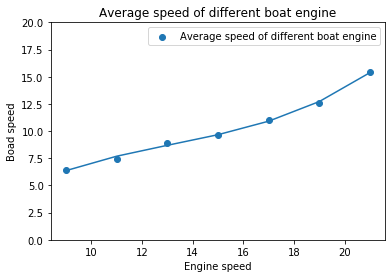

The equation of regression line is y=0.006x^3+-0.243x^2+3.676x+-11.5036458333338.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
engspeed = np.arange(9,23,2)
avespeed = np.array([6.45,7.44,8.88,9.66,10.98,12.56,15.44])
plt.scatter(engspeed,avespeed,label='Average speed of different boat engine')

coef = np.polyfit(engspeed, avespeed, 3)
equ = np.poly1d(coef)
y = equ(engspeed)
plt.plot(engspeed, y)

plt.title("Average speed of different boat engine")
plt.xlabel('Engine speed')
plt.ylabel('Boad speed')
plt.ylim(0,20)
plt.legend()
plt.show()

print(f'The equation of regression line is y={coef[0]:.3f}x^3+{coef[1]:.3f}x^2+{coef[2]:.3f}x+{coef[3]}.')


## Practice

Draw a scatter plot and a cubic regression line. Pring the cubic equation.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(1,8)
y=np.array([0,0.012,0.06,0.162,0.336,0.6,0.972])

print(x)
print(y)
coef = np.polyfit(x, y, 3)
print(coef)

[1 2 3 4 5 6 7]
[0.    0.012 0.06  0.162 0.336 0.6   0.972]
[ 3.00000000e-03 -1.16796094e-16 -9.00000000e-03  6.00000000e-03]


## Answer

Could you plot a scatter and a regression line? The regression line equation should be $0.003x^3+0.009x+0.006$ The coefficients are [ 3.00000000e-03, -1.16796094e-16, -9.00000000e-03,  6.00000000e-03]. These means $3\cdot10^{-3}, -1.167\cdot10^{-16}, -9\cdot10^{-3}, 6\cdot10^{-3}$. The second one is practically 0.

In [24]:
print(300e-03)
print(300*10**(-3))

0.3
0.3


# Exponential models


In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

day = np.arange(0,8)
weight = np.array([251,209,157,129,103,81,66,49])
print(day)
print(weight)

[0 1 2 3 4 5 6 7]
[251 209 157 129 103  81  66  49]


 `p0=(1, 1e-6, 1)` avoid a warning.

## $a\cdot e^{-bx}+c$

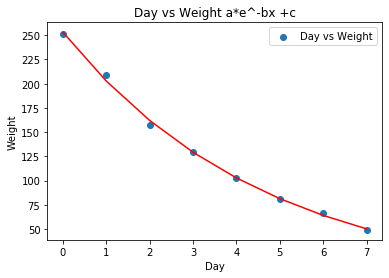

The equation of regression line is y=261.33e^(0.21x)+-8.24


In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, weight, p0=[1, 1e-6, 1])
plt.scatter(day,weight,label='Day vs Weight')
plt.plot(day, func(day, *popt), 'r-')
plt.title("Day vs Weight a*e^-bx +c")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(2)
b=popt[1].round(2)
c=popt[2].round(2)

print(f'The equation of regression line is y={a}e^({b}x)+{c}')

# print(popt)
# print(pcov)
# print(func(day, *popt))
# print(*popt)

## $a\cdot e^{-bx}$

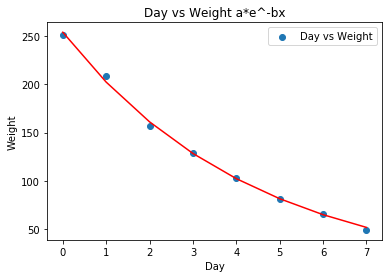

The equation of regression line is y=254.05e^(0.23x)


In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

def func2(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(func2, day, weight, p0=[1, 1e-6])
plt.scatter(day,weight,label='Day vs Weight')
plt.plot(day, func2(day, *popt), 'r-')
plt.title("Day vs Weight a*e^-bx")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(2)
b=popt[1].round(2)

print(f'The equation of regression line is y={a}e^({b}x)')


# print(mpopt)
# print(mpcov)
# print(myfunc(day, *mpopt))
# print(*mpopt)

## $a\cdot b^x$

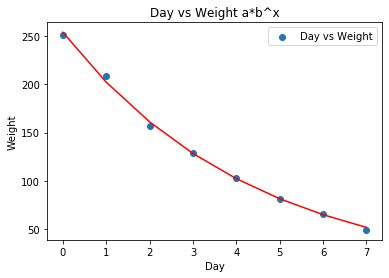

The equation of regression line is y=254.05*0.8^x


In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

def func3(x, a, b):
    return a * b ** x

popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
plt.scatter(day,weight,label='Day vs Weight')
plt.plot(day, func3(day, *popt), 'r-')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(2)
b=popt[1].round(2)

print(f'The equation of regression line is y={a}*{b}^x')

# print(popt)
# print(pcov)
# print(func(day, *popt))
# print(*popt)

## Comparing with TI n-spire result

TI nspire's Exponential regression fits the model equation $y=ab^x$ to the data using a least-squares fit on tranformed values x and $ln(y)$.

<center><img src="image/expo.png"></center>

# Logarithmic models

## Semi-log models


In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(0,30,4)
bacteria = np.array([20,150,453,920,1820,9765,15487,19450])
print(time)
print(bacteria)

[ 0  4  8 12 16 20 24 28]
[   20   150   453   920  1820  9765 15487 19450]


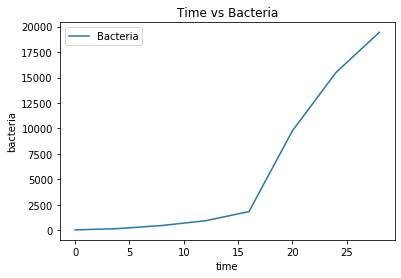

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time,bacteria,label='Bacteria')
plt.title("Time vs Bacteria")
plt.xlabel('time')
plt.ylabel('bacteria')
plt.legend()
plt.show()

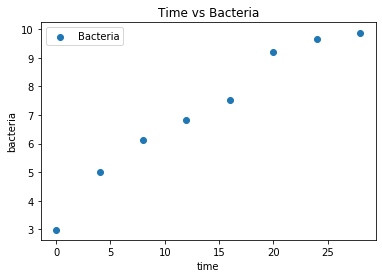

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

plt.scatter(time,np.log(bacteria),label='Bacteria')
plt.title("Time vs Bacteria")
plt.xlabel('time')
plt.ylabel('bacteria')
plt.legend()
plt.show()

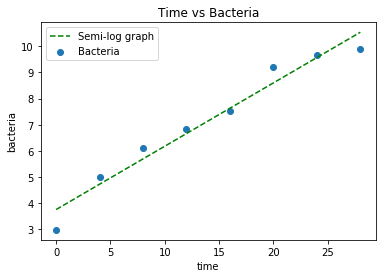

The equation of regression line is y=0.242 * x + 3.760


In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p = np.polyfit(time, np.log(bacteria), 1)
plt.scatter(time,np.log(bacteria),label='Bacteria')
plt.plot(time, p[0] * time + p[1], 'g--', label='Semi-log graph')
plt.title("Time vs Bacteria")
plt.xlabel('time')
plt.ylabel('bacteria')
plt.legend()
plt.show()

print(f'The equation of regression line is y={p[0]:.3f} * x + {p[1]:.3f}')

## Log-log models


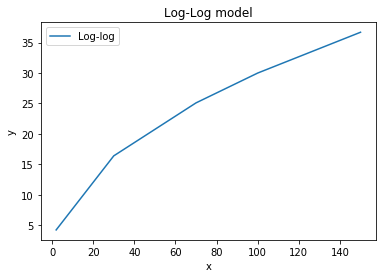

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([2,30,70,100,150])
y=np.array([4.24,16.4,25.1,30,36.7])
plt.plot(x,y,label='Log-log')
plt.title("Log-Log model")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

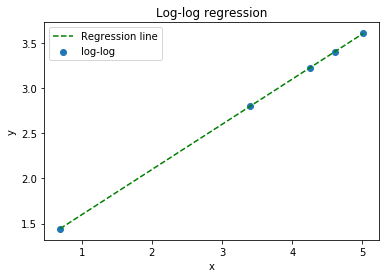

The equation of regression line is ln(y)=0.500 * ln(x) + 1.098


In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p = np.polyfit(np.log(x), np.log(y), 1)
plt.scatter(np.log(x),np.log(y),label='log-log')
plt.plot(np.log(x), p[0] * np.log(x) + p[1], 'g--', label='Regression line')
plt.title("Log-log regression")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


print(f'The equation of regression line is ln(y)={p[0]:.3f} * ln(x) + {p[1]:.3f}')

# Sinusoidal models


In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

year=np.arange(0,24,2)
population=np.array([10.2,11.1,12,11.7,10.6,10,10.6,11.7,12,11.1,10.2,10.2])

print(year)
print(population)



[ 0  2  4  6  8 10 12 14 16 18 20 22]
[10.2 11.1 12.  11.7 10.6 10.  10.6 11.7 12.  11.1 10.2 10.2]


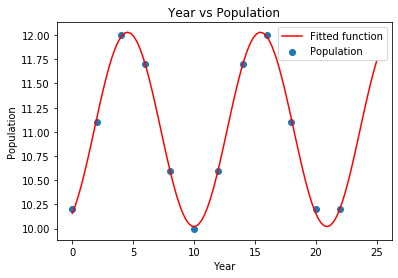

1.0046552042582326 0.5752844278539975 103.69982811271298 11.025078017874737


In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import curve_fit

def sinfunc(x, a, b, c, d):
    return a * np.sin(b * (x - np.radians(c)))+d


popt, pcov = curve_fit(sinfunc, year, population, p0=[1,0.4,1,5])
# popt, pcov = curve_fit(sinfunc, year, population)


x_data = np.linspace(0, 25, num=100)

plt.scatter(year,population,label='Population')
plt.plot(x_data, sinfunc(x_data, *popt), 'r-',label='Fitted function')
plt.title("Year vs Population")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

print(*popt)

[2.9        1.5        1.57079633 5.        ]


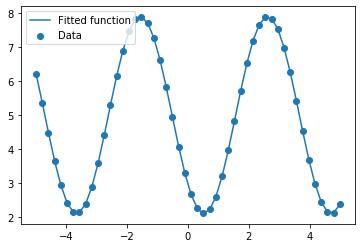

50
50


In [89]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * (x_data - np.pi/2)) + 5


from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.sin(b * (x - c))+d

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2, 2, 2])

print(params)
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, *params),
         label='Fitted function')

plt.legend(loc='best')

plt.show()


# Logistic models

In [140]:
from sklearn.linear_model import LogisticRegression 
from scipy.special import expit

x=np.arange(0,10).reshape(-1, 1)
y=np.array([52,133,203,230,237,239.5,239.8,239.9,240,240])
# print(x)
# print(y)
logisticreg = LogisticRegression(random_state = 0)
clf=logisticreg.fit(x, y.astype('int')) 
x_plot=np.linspace(-10,10,100).reshape(-1, 1)

# clf = LogisticRegression(C=1e5)
# clf.fit(x, y)
loss = expit(x * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

# print(x_plot)
plt.scatter(x, y, label='Regression line')
# plt.plot(x_plot,logisticreg.predict(x_plot))
plt.title("Logistic regression")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (10,1) (7,1) 

You need to use int for y-value.

https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python

# Reference

- https://realpython.com/linear-regression-in-python/